In [40]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit

In [41]:
def line(x, k, b):
    return x*k + b

In [49]:
df = pd.read_csv(r"raw-data/discharge.txt")
U = df['U']*10
I = df['I']*6/155

In [133]:
I_line = I[:8]
U_line = U[:8]
opt, cov = curve_fit(line, U_line, I_line)

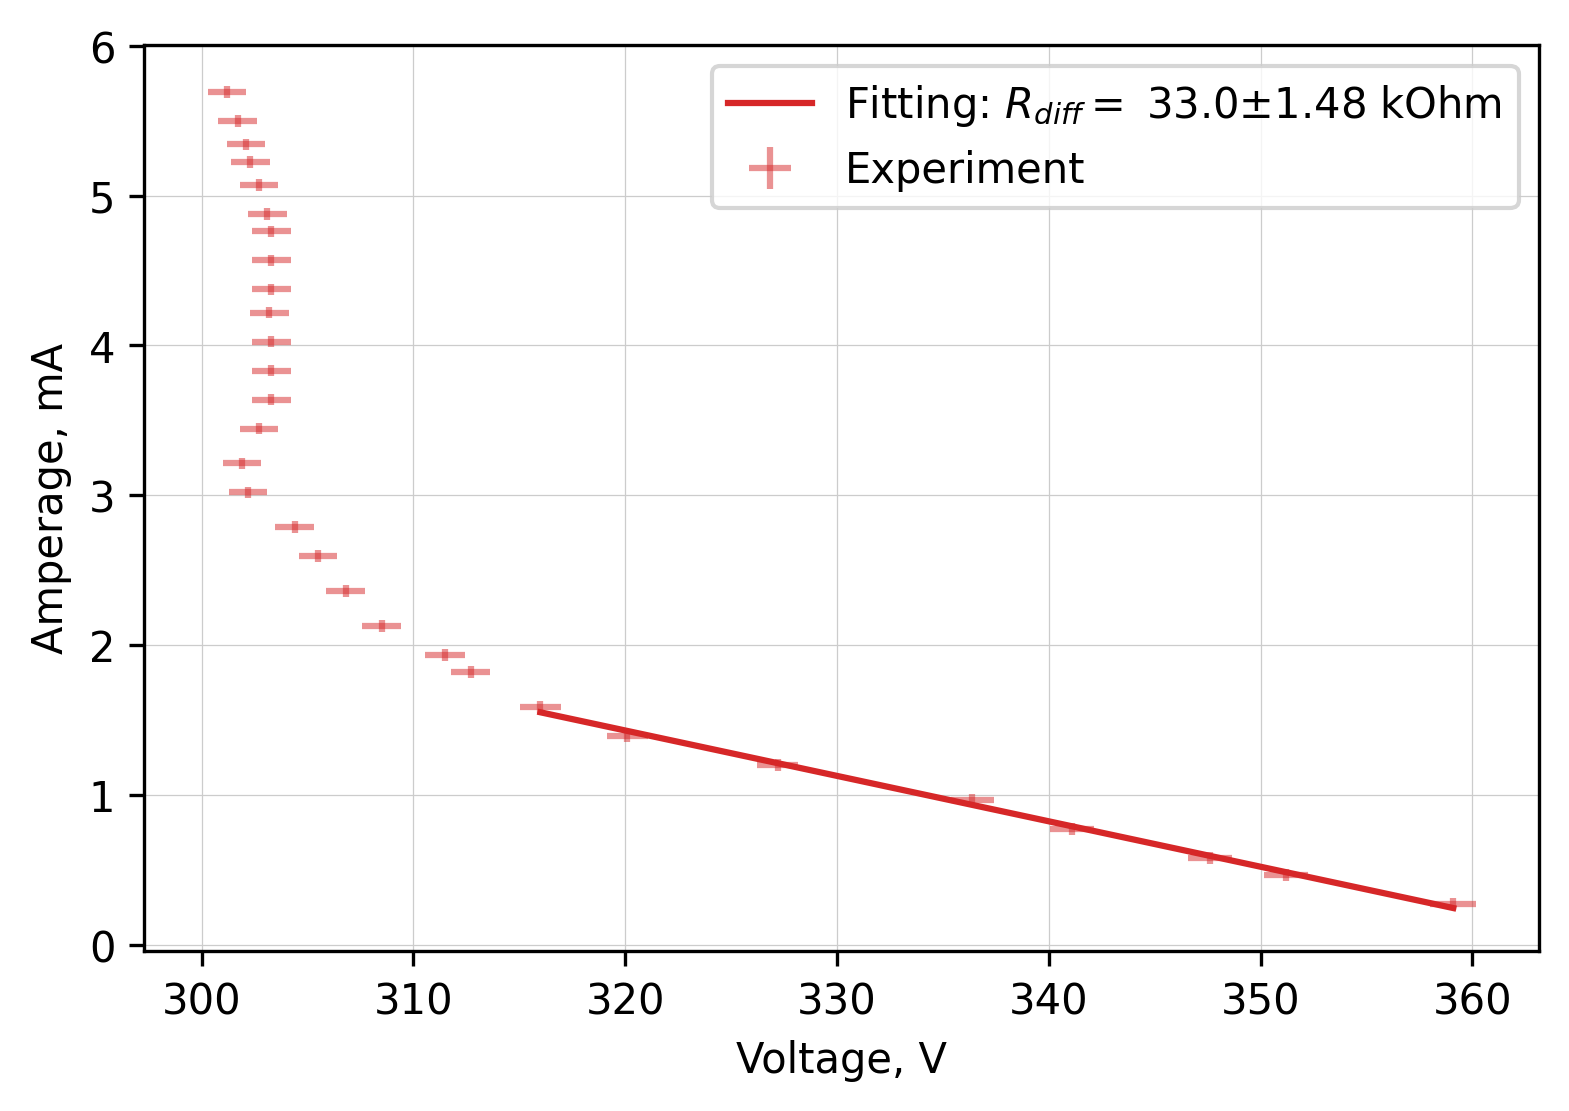

In [153]:
plt.figure(figsize=(6, 4), dpi=300)

# plt.minorticks_on()
plt.grid(which='minor', linestyle=':', color='0.9')
plt.grid(which='major', linestyle='-', color='0.8', linewidth=0.3)

plt.errorbar(U, I, yerr=6/155, xerr=0.003*U, linestyle='', marker='.', markersize=0, label="Experiment", color="tab:red", alpha=0.5)
plt.plot(U_line, line(U_line, opt[0], opt[1]), label=r"Fitting: $R_{diff}=$ " + f"{-1/opt[0]:.1f}" + r"$\pm 1.48$ kOhm", color="tab:red", linestyle='-')

# plt.title("ВАХ разряда", fontsize=16)
plt.ylabel("Amperage, mA")
plt.xlabel("Voltage, V")

plt.legend()
plt.savefig(r"images\vah-discharge.png", facecolor="white")
plt.show()

**Кривая соответствует участку ГД** -- поднормальный тлеющий разряд

In [230]:
pr = []
pr.append(pd.read_csv(r"raw-data\probe5.txt"))
pr.append(pd.read_csv(r"raw-data\probe3.txt"))
pr.append(pd.read_csv(r"raw-data\probe1-5.txt"))

I_name = [5, 3, 1.5]
colors = ["orange", "green", "blue"]
U_corr = [0.2, 0.3, 0.3]

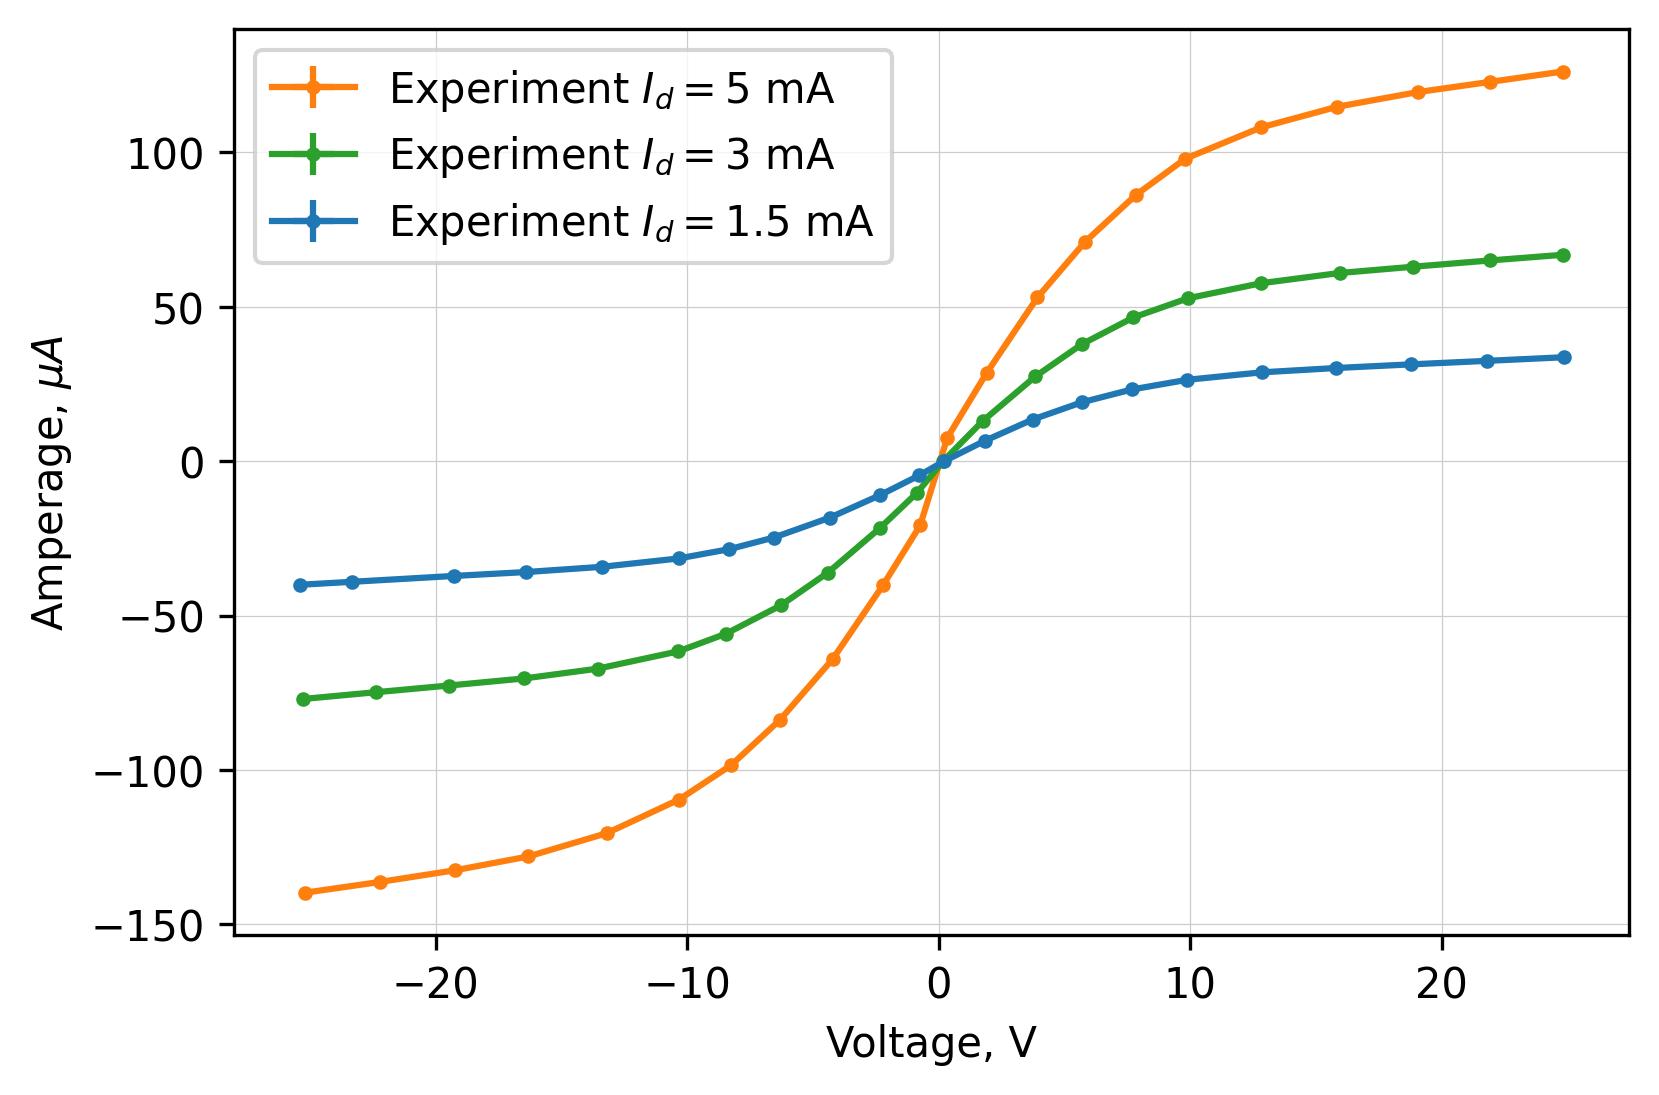

In [231]:
plt.figure(figsize=(6, 4), dpi=300)

# plt.minorticks_on()
plt.grid(which='minor', linestyle=':', color='0.9')
plt.grid(which='major', linestyle='-', color='0.8', linewidth=0.3)

for index, probe in enumerate(pr):
    U = probe['U'] - U_corr[index]
    I = probe['I']
    plt.errorbar(U, I, yerr=0.003*I, xerr=0.003*U, linestyle='-', marker='.', markersize=5, label=r"Experiment $I_d = $" + f"{I_name[index]}" +" mA", color=f"tab:{colors[index]}", alpha=1)
# plt.plot(U_line, line(U_line, opt[0], opt[1]), label=r"Fitting: $R_{diff}=$ " + f"{-1/opt[0]:.1f}" + r"$\pm 1.48$ kOhm", color="tab:red", linestyle='-')

# plt.title("ВАХ разряда", fontsize=16)
plt.ylabel("Amperage, $\mu A$")
plt.xlabel("Voltage, V")

plt.legend()
plt.savefig(r"images\vah-probe.png", facecolor="white")
plt.show()

I_plus_5 = 90.4775	 I_minus_5 = -101.2500
I_plus_3 = 48.5366	 I_minus_3 = -56.4262
I_plus_1.5 = 23.7260	 I_minus_1.5 = -27.9161


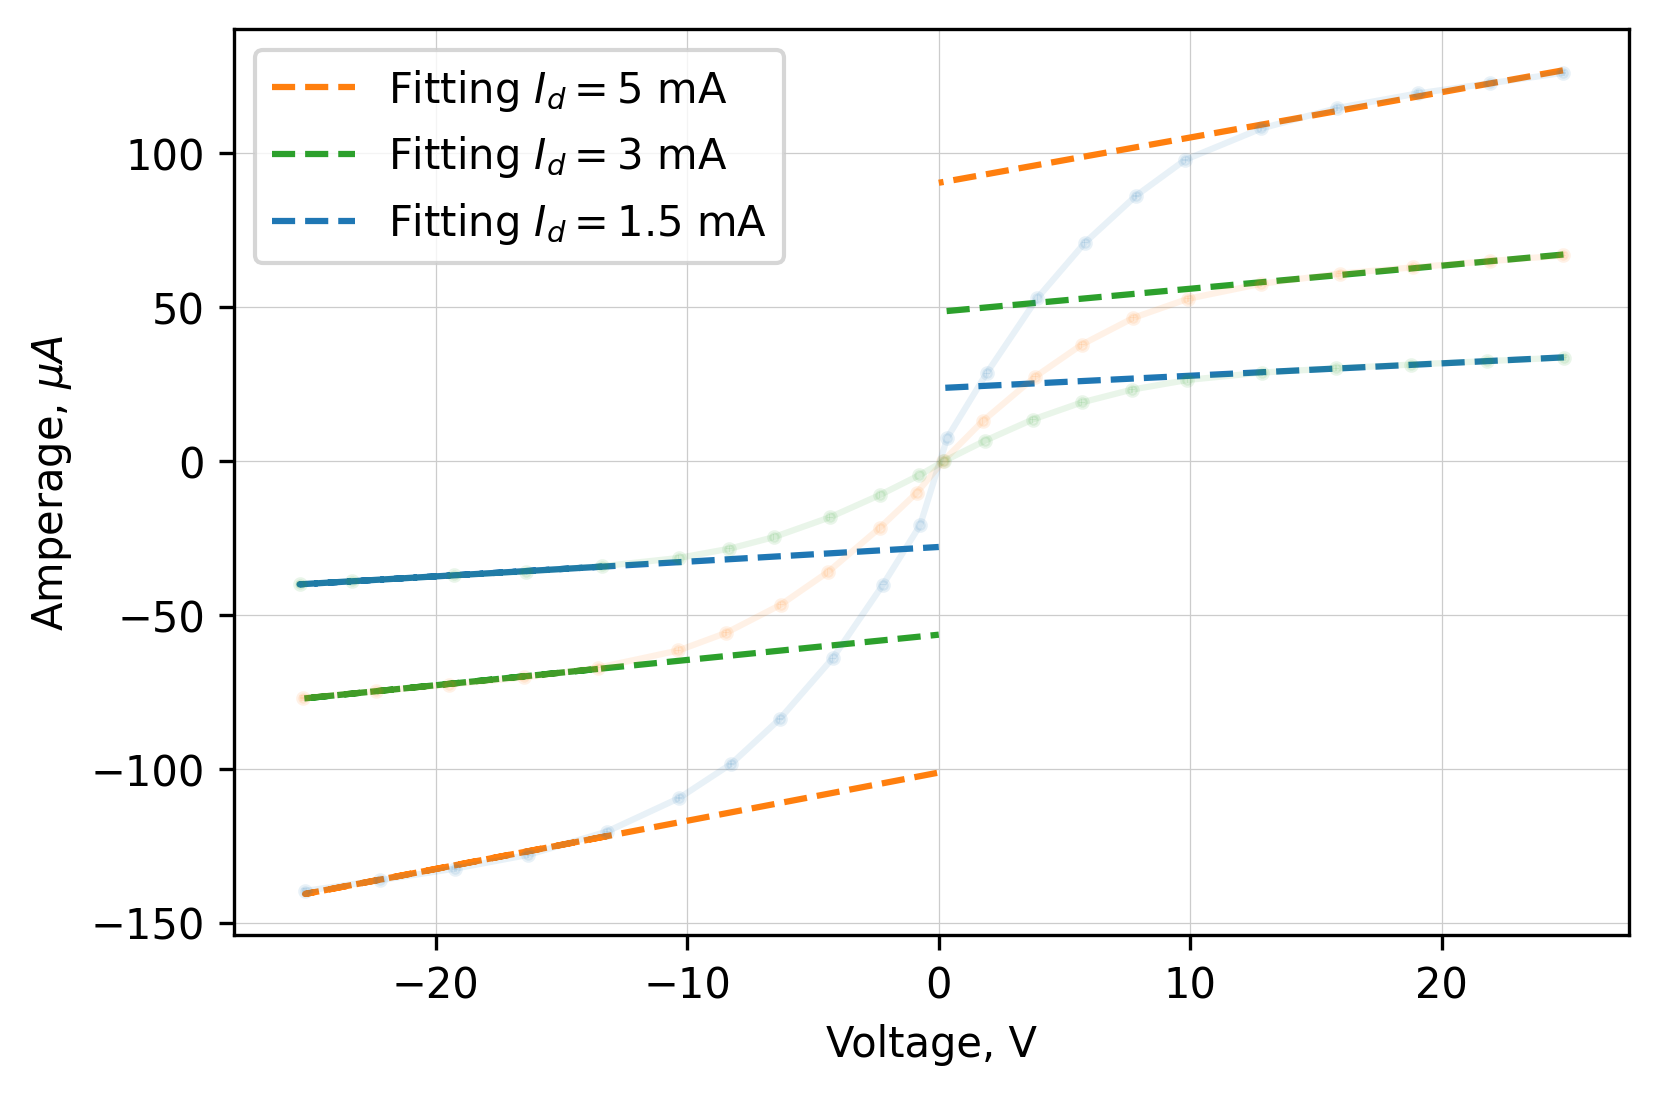

In [252]:
plt.figure(figsize=(6, 4), dpi=300)

# plt.minorticks_on()
plt.grid(which='minor', linestyle=':', color='0.9')
plt.grid(which='major', linestyle='-', color='0.8', linewidth=0.3)

for index, probe in enumerate(pr):
    U = probe['U'] - U_corr[index]
    I = probe['I']
    plt.errorbar(U, I, yerr=0.003*I, xerr=0.003*U, linestyle='-', marker='.', markersize=5, alpha=0.1)
    
    U_plus = np.concatenate([U[:5], [0]])
    U_minus = np.concatenate([U[-5:], [0]])
    
    ptr_plus, _ = curve_fit(line, U[:5], I[:5])
    ptr_minus, _ = curve_fit(line, U[-5:], I[-5:])
    
    plt.plot(U_plus, line(U_plus, ptr_plus[0], ptr_plus[1]), color=f"tab:{colors[index]}", linestyle='--', label=r"Fitting $I_d = $" + f"{I_name[index]}" +" mA")
    plt.plot(U_minus, line(U_minus, ptr_minus[0], ptr_minus[1]), color=f"tab:{colors[index]}", linestyle='--')
    
    print(f"I_plus_{I_name[index]} = {line(0, ptr_plus[0], ptr_plus[1]):.4f}\t I_minus_{I_name[index]} = {line(0, ptr_minus[0], ptr_minus[1]):.4f}")

# plt.plot(U_line, line(U_line, opt[0], opt[1]), label=r"Fitting: $R_{diff}=$ " + f"{-1/opt[0]:.1f}" + r"$\pm 1.48$ kOhm", color="tab:red", linestyle='-')

# plt.title("ВАХ разряда", fontsize=16)
plt.ylabel("Amperage, $\mu A$")
plt.xlabel("Voltage, V")

plt.legend()
plt.savefig(r"images\vah-probe.png", facecolor="white")
plt.show()

In [246]:
a = np.array([1, 2, 3])
b = np.array([2, 5, 6])
np.concatenate([a, b])

array([1, 2, 3, 2, 5, 6])